In [2]:
# bibliotecas utilizadas

import pandas as pd
import random
import time
import numpy as np
import tsp_io3

### **DATOS**

In [ ]:
excel = pd.read_excel('P-C12-1C2025_dataset.xlsx', sheet_name='clientes')

dataset = []
for index, row in excel.iterrows():
  tupla = (row["X"], row["Y"])
  dataset.append(tupla)
""" SE ESPERA TENER UNA LISTA LLAMADA dataset CON LAS TUPLAS (X,Y) DE CADDA CLIENTE"""
""" POR EJEMPLO dataset = [(10, 21), (21, 42), (52, 63)] """
dataset

### **MODELO**

In [61]:
tsp = tsp_io3.TSP(dataset, pos_init= (20, 30))   # el local se encuentra en X=20, Y=30 (dato)

In [62]:
tsp

In [63]:
# parámetros de recocido simulado

max_iterations = 10000                # máximo de iteraciones
temp_ini = 100                           # temperatura inicial
temp_final = 1                         # temperatura final
enfriamiento = 0.05                      # coeficiente de enfriamient
stop_max = 1000                           # máximo de iteraciones sin mejora
n = len(dataset)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148]


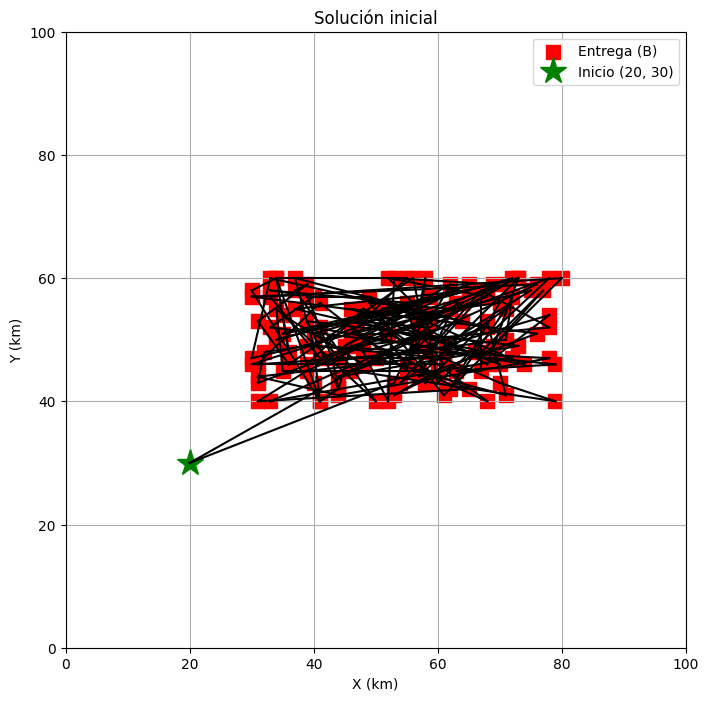

In [64]:
"""" PROBAR CON SOLUCION ALEATORIA PERO LUEGO, CAMBIAR A GREEDY COMO DICE EL ENUNCIADO """
# solución factible incial
ruta_actual = list(range(n))
print(ruta_actual)
random.shuffle(ruta_actual)
tsp.visualizar(ruta_actual, "Solución inicial")

In [65]:
# RECOCIDO SIMULADO (SA) + BÚSQUEDA LOCAL (2-OPT)
# parámetros de recocido simulado
max_iterations = 1000000                # máximo de iteraciones
temp_ini = 100                           # temperatura inicial
temp_final = 0                         # temperatura final
enfriamiento = 0.999                     # coeficiente de enfriamient
stop_max = 1000                           # máximo de iteraciones sin mejora
n = len(dataset)

costo_actual = tsp.costo(ruta_actual)   # costo de la solución inicial
mejor_ruta = ruta_actual[:]             # la mejor ruta es la incial (la única)
mejor_costo = costo_actual              # calculo el costo de la mejor ruta
temp = temp_ini                         # inicializo la temperatura
stop = 0                                # contador de iteraciones sin mejora

start_time = time.time()    # inicio del temporizador

for _ in range(max_iterations):

    # selecciona una nueva solución aleatoria a partir de un vecino de la solución actual
    nueva_ruta = tsp.vecino(ruta_actual)
    nuevo_costo = tsp.costo(nueva_ruta)

    # ¿la nueva solución es mejor que la actual?
    if nuevo_costo < costo_actual:
        ruta_actual = nueva_ruta[:]
        costo_actual = nuevo_costo

        # ¿la nueva solución es la mejor encontrada hasta el momento?
        if costo_actual < mejor_costo:
            mejor_ruta = nueva_ruta[:]
            mejor_costo = nuevo_costo
            stop = 0

    # si no, proceso de aceptación estocástico
    else:
        stop += 1
        if temp == 0:
          temp = 1
        if np.random.random() < np.exp((costo_actual - nuevo_costo) / temp):
            ruta_actual = nueva_ruta[:]
            costo_actual = nuevo_costo

    # ¿cumplo la condición de finalización por temperatura?
    if temp == temp_final:
        print("Ending process because of temp condition")
        break

    # ¿cumplo la condición de finalización por iteraciones sin mejora?
    if stop == stop_max:
        print("Ending process because of max iters condition")
        break

    # actualizo la temperatura
    temp = temp * enfriamiento

tiempo = time.time() - start_time   # calculo el tiempo

Ending process because of max iters condition


SA - Costo: 414.16 km, Tiempo: 2.6071 seg, iteraciones: 29523


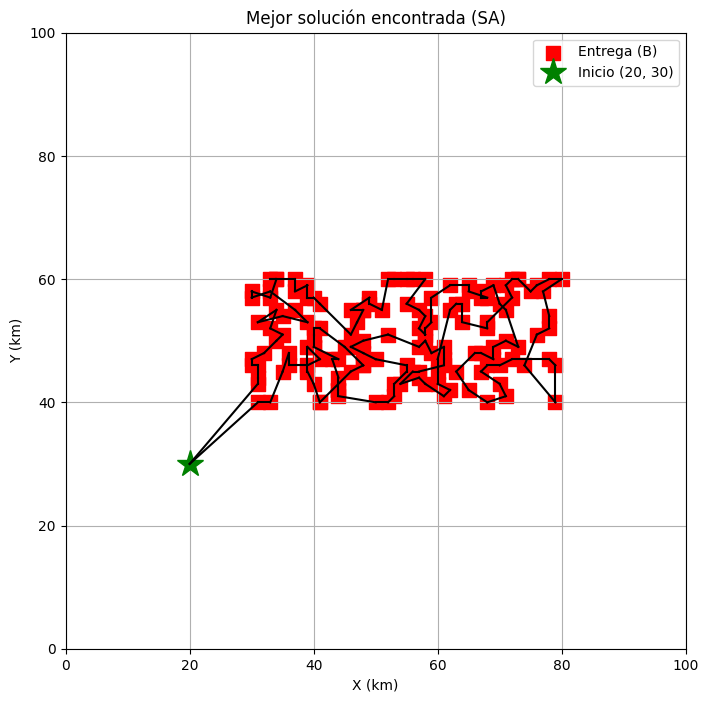

In [66]:
# impresión de resultados

print(f"SA - Costo: {mejor_costo:.2f} km, Tiempo: {tiempo:.4f} seg, iteraciones: {_}")

tsp.visualizar(mejor_ruta, "Mejor solución encontrada (SA)")

## Iterando max iters y temp para ver cuando funciona mejor greedy

============== COEFICIENTE DE ENFRIAMIENTO ACTUAL: 0.9999 ==============
Ending process because of max iters condition
SA - Costo: 360.64 km, Tiempo: 27.8218 seg, iteraciones: 291228


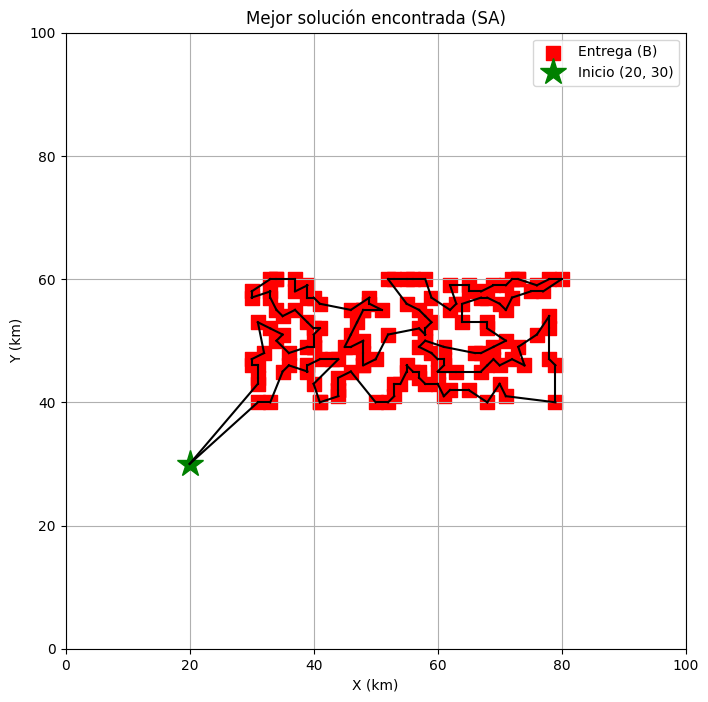

============== COEFICIENTE DE ENFRIAMIENTO ACTUAL: 0.9 ==============
Ending process because of max iters condition
SA - Costo: 360.64 km, Tiempo: 28.1014 seg, iteraciones: 0


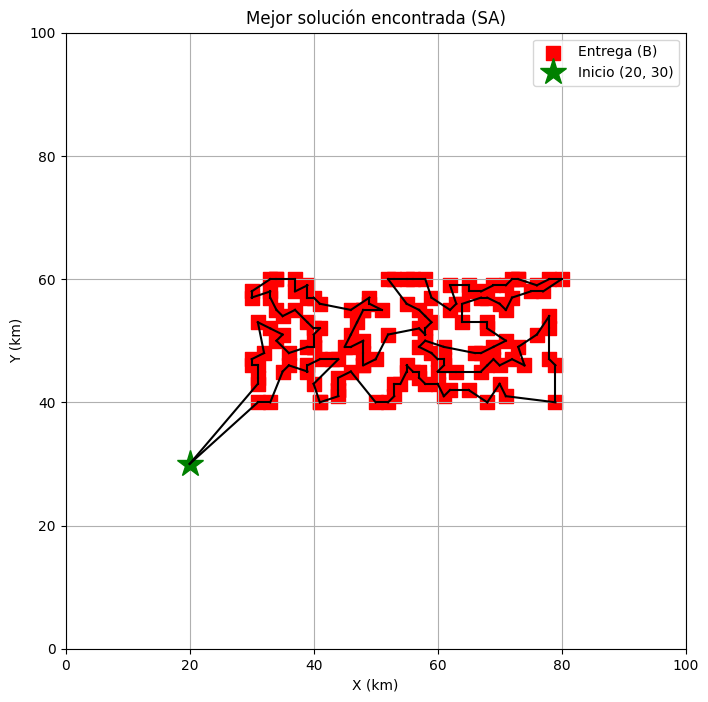

============== COEFICIENTE DE ENFRIAMIENTO ACTUAL: 0.8 ==============
Ending process because of max iters condition
SA - Costo: 360.64 km, Tiempo: 28.4064 seg, iteraciones: 0


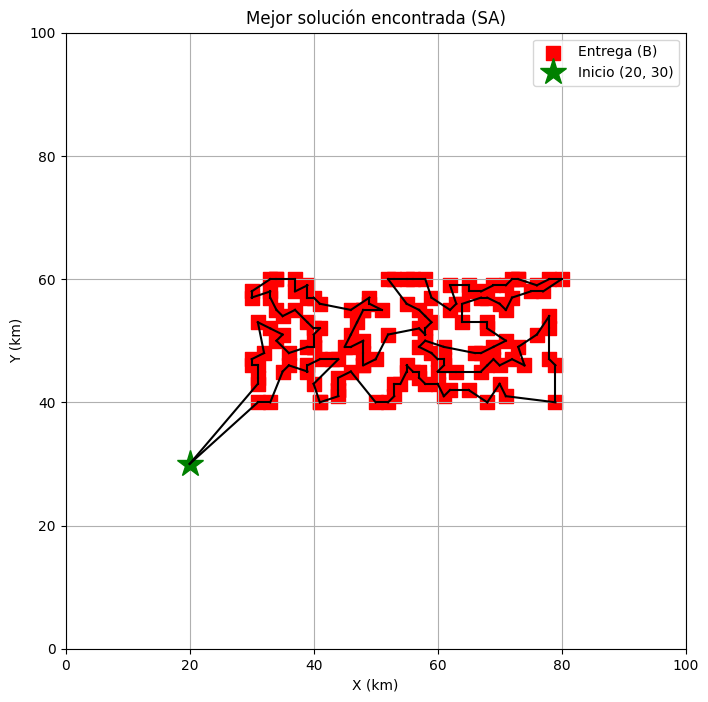

In [69]:
# RECOCIDO SIMULADO (SA) + BÚSQUEDA LOCAL (2-OPT)
# parámetros de recocido simulado
max_iterations = 500000               # máximo de iteraciones
temp_ini = 100                           # temperatura inicial
temp_final = 0                         # temperatura final
enfriamientos = [0.9999, 0.9, 0.8]                     # coeficiente de enfriamient
stop_max = 100000                           # máximo de iteraciones sin mejora
n = len(dataset)

costo_actual = tsp.costo(ruta_actual)   # costo de la solución inicial
mejor_ruta = ruta_actual[:]             # la mejor ruta es la incial (la única)
mejor_costo = costo_actual              # calculo el costo de la mejor ruta
temp = temp_ini                         # inicializo la temperatura
stop = 0                                # contador de iteraciones sin mejora

start_time = time.time()    # inicio del temporizador

for enfriamiento in enfriamientos:
  print(f"============== COEFICIENTE DE ENFRIAMIENTO ACTUAL: {enfriamiento} ==============")
  for _ in range(max_iterations):

      # selecciona una nueva solución aleatoria a partir de un vecino de la solución actual
      nueva_ruta = tsp.vecino(ruta_actual)
      nuevo_costo = tsp.costo(nueva_ruta)

      # ¿la nueva solución es mejor que la actual?
      if nuevo_costo < costo_actual:
          ruta_actual = nueva_ruta[:]
          costo_actual = nuevo_costo

          # ¿la nueva solución es la mejor encontrada hasta el momento?
          if costo_actual < mejor_costo:
              mejor_ruta = nueva_ruta[:]
              mejor_costo = nuevo_costo
              stop = 0

      # si no, proceso de aceptación estocástico
      else:
          stop += 1
          if temp == 0:
            temp = 1
          if np.random.random() < np.exp((costo_actual - nuevo_costo) / temp):
              ruta_actual = nueva_ruta[:]
              costo_actual = nuevo_costo

      # ¿cumplo la condición de finalización por temperatura?
      if temp <= temp_final:
          print("Ending process because of temp condition")
          break

      # ¿cumplo la condición de finalización por iteraciones sin mejora?
      if stop >= stop_max:
          print("Ending process because of max iters condition")
          break

      # actualizo la temperatura
      temp = temp * enfriamiento

  tiempo = time.time() - start_time   # calculo el tiempo

  # impresión de resultados
  print(f"SA - Costo: {mejor_costo:.2f} km, Tiempo: {tiempo:.4f} seg, iteraciones: {_}")

  tsp.visualizar(mejor_ruta, "Mejor solución encontrada (SA)")

### Directamente con busqueda local

LS-2OPT - Costo: 360.64 km, Tiempo: 1.6054 seg


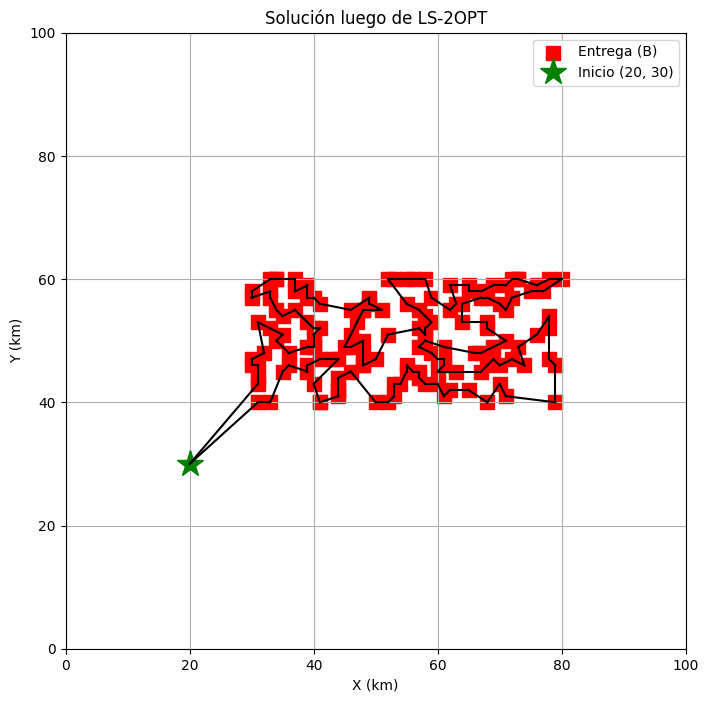

In [70]:
# Búsqueda local 2-opt para mejorar la ruta

start_time = time.time()
n = len(dataset)
mejor_costo = tsp.costo(mejor_ruta)
mejora = True

while mejora:
    mejora = False
    for i in range(n-1):
        for j in range(i+2, n):
            # Genera una nueva ruta invirtiendo el segmento entre i y j
            nueva_ruta = mejor_ruta[:i] + mejor_ruta[i:j+1][::-1] + mejor_ruta[j+1:]
            nuevo_costo = tsp.costo(nueva_ruta)
            # ¿la nueva ruta es mejor que la mejor ruta encontrada hasta ahora?
            if nuevo_costo < mejor_costo:
                mejor_ruta = nueva_ruta[:]
                mejor_costo = nuevo_costo
                mejora = True
    ruta = mejor_ruta[:]

tiempo = time.time() - start_time

print(f"LS-2OPT - Costo: {mejor_costo:.2f} km, Tiempo: {tiempo:.4f} seg")

tsp.visualizar(mejor_ruta, "Solución luego de LS-2OPT")